# Word cloud on Project descriptions

Generating a word cloud from the descriptions of the live [DataCamp Projects](https://datacamp.com/projects/). We will have to first scrape them and then use them to generate the word cloud. Let's begin. 

In [23]:
# Dependencies
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# The main URL where all the project names and their descriptions can be found
root_url = 'https://www.datacamp.com/projects/'

# Necessary for scrapping
headers = {'user-agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) \
Chrome/71.0.3578.98 Safari/537.36'}

In [3]:
# Begin the scrapping process
descriptions = []

project_data = requests.get(root_url, headers=headers)
soup = BeautifulSoup(project_data.text, 'html.parser')
res = soup.find_all('small', attrs={'class': 'dc-project-block__description'})

for entry in res:
    descriptions.append(entry.get_text())

descriptions_df = pd.DataFrame(data = descriptions, columns = ['project_description'])

In [4]:
descriptions_df.head()

,project_description
0,"If you've never done a DataCamp project, this ..."
1,"If you've never done a DataCamp project, this ..."
2,In this project we will explore a database of ...
3,Reanalyse the data behind one of the most impo...
4,Use R to make art and create imaginary flowers...


## Duplicates shall not pass

In [5]:
descriptions_df.drop_duplicates(inplace=True)

## Word cloud with the first description

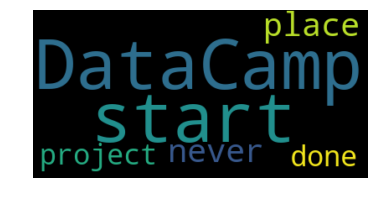

In [12]:
# Start with the first description :)
text = descriptions_df.project_description[0]

# Create and generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

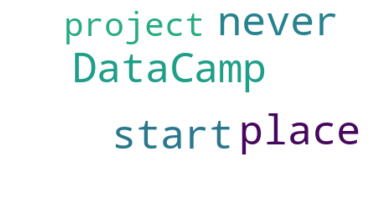

In [13]:
# Tweak some of the arguments to give it an elegant look
wordcloud = WordCloud(max_font_size=50, max_words=5, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Does not make much sense up until now. Let's take the remaining the descriptions and merge in a big DataFrame.

In [15]:
text = " ".join(description for description in descriptions_df.project_description)
print ("There are {} words in the merging of all the descriptions.".format(len(text)))

There are 5490 words in the merging of all the descriptions.


## Combining the descriptions

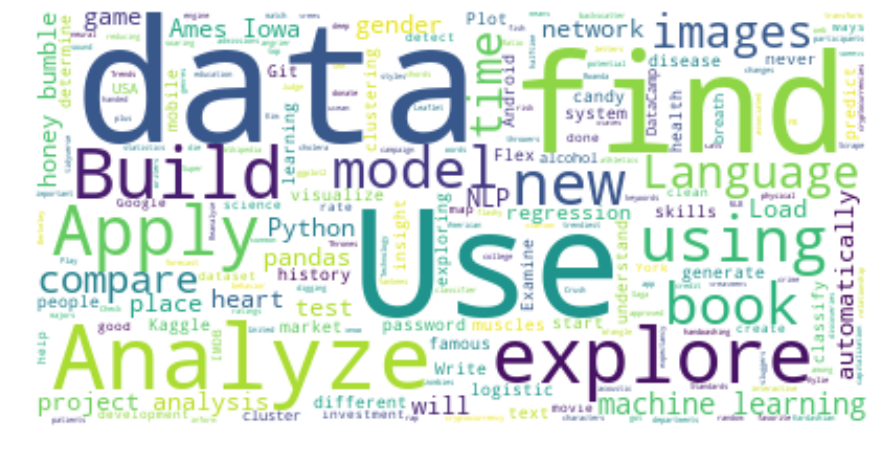

In [32]:
# Create stopword list
stopwords = set(STOPWORDS)
stopwords.update(['bees']) # Might be good idea to discard this word

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Construct and display the generated image
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Masking the word cloud according to the DataCamp logo

![](https://cdn.datacamp.com/main-app/assets/brand/logos/DataCamp_Icon_RGB-a3afe004da4a462151b8e87a89937603ea50534f338d4600cb11043a9cc434c9.png)

In [28]:
# Load in the Datacamp logo to use as mask
datacamp_logo = np.array(Image.open("image/DataCamp_Logo.png"))
datacamp_logo

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

These pixel intensities (0-valued) won't serve good as a mask image. We will have to convert it to 255.

In [29]:
def transform_pixels(pixel):
    if pixel == 0:
        return 255
    else:
        return pixel

In [30]:
# Transform the mask into a new one that will work with the function
transformed_pixels = np.ndarray((datacamp_logo.shape[0],datacamp_logo.shape[1]), np.int32)

for i in range(len(datacamp_logo)):
    transformed_pixels[i] = list(map(transform_pixels, datacamp_logo[i]))

(-0.5, 290.5, 309.5, -0.5)

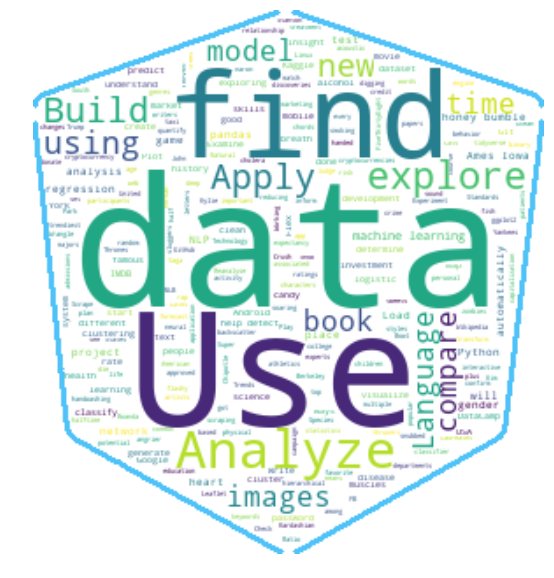

In [52]:
# Reconstruct a word cloud
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_pixels,
               stopwords=stopwords, contour_width=3, contour_color='#4fc3f7')

# Generate a word cloud image
wc.generate(text)

# Display
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

In [53]:
# Save the image
wordcloud.to_file("image/datacamp_wordcloud.png")